In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

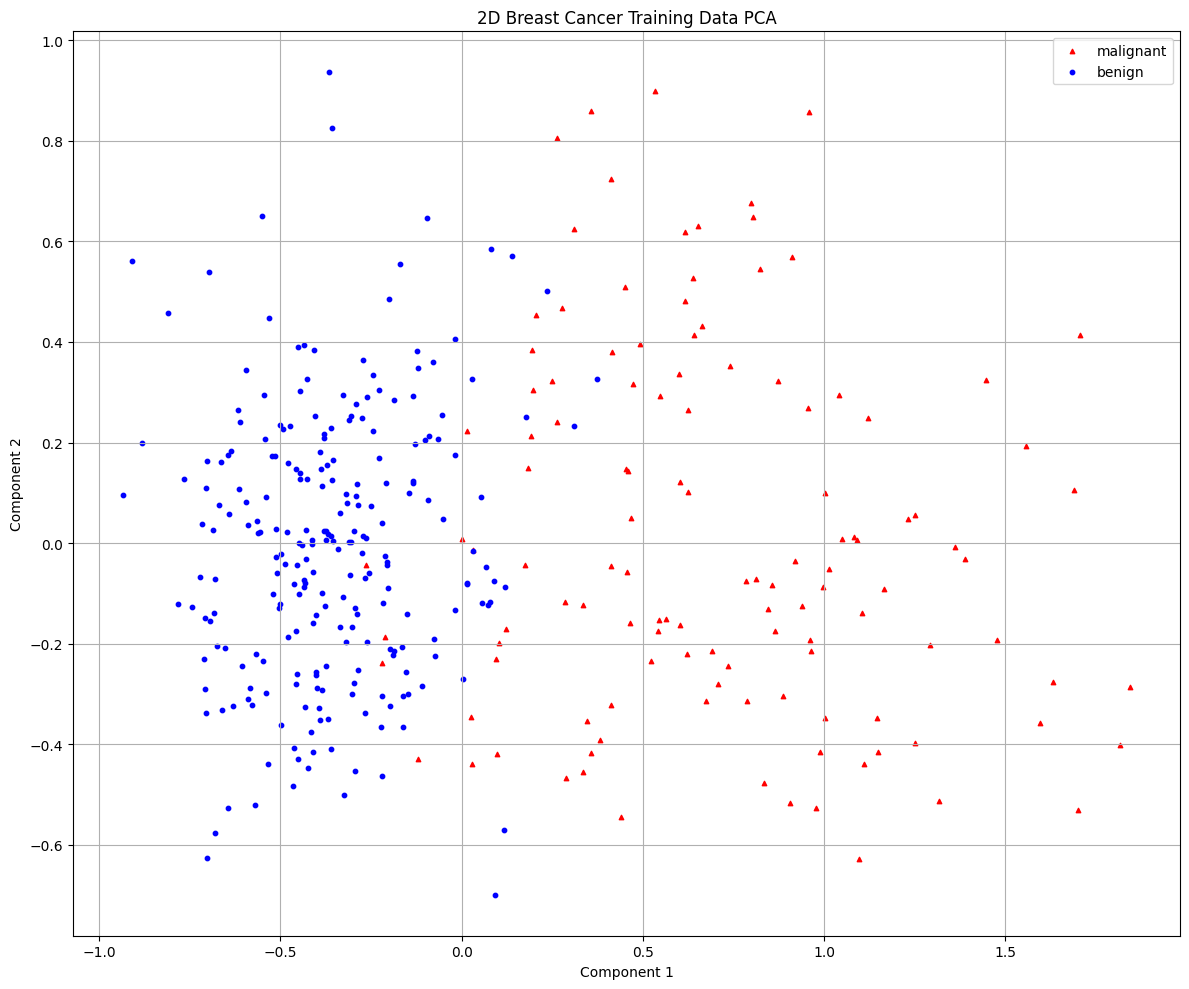

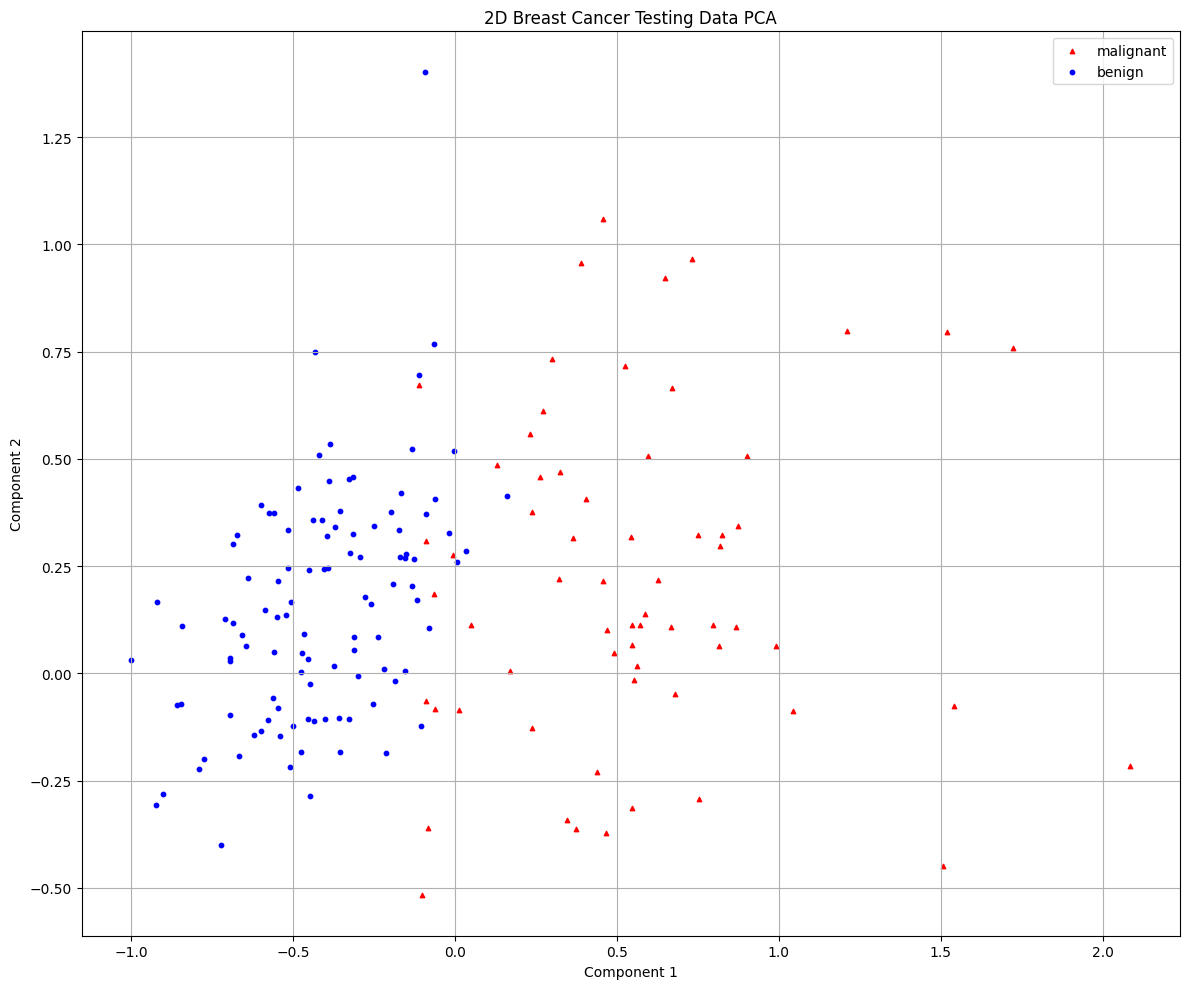

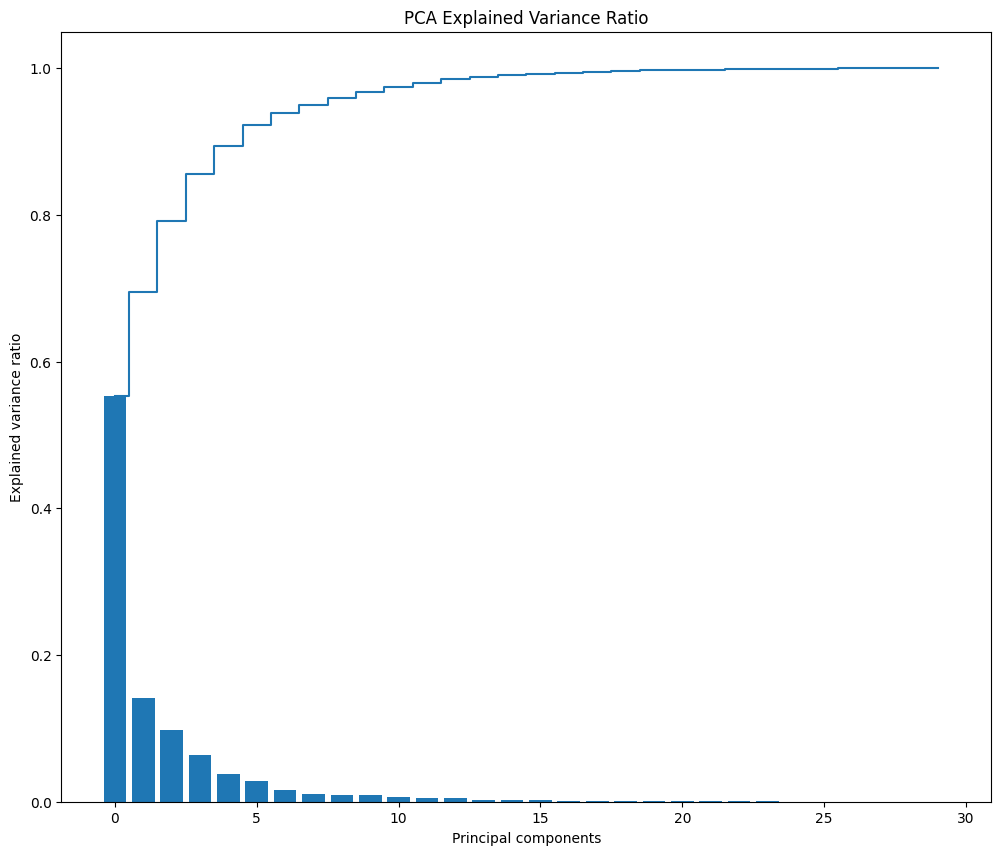

In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

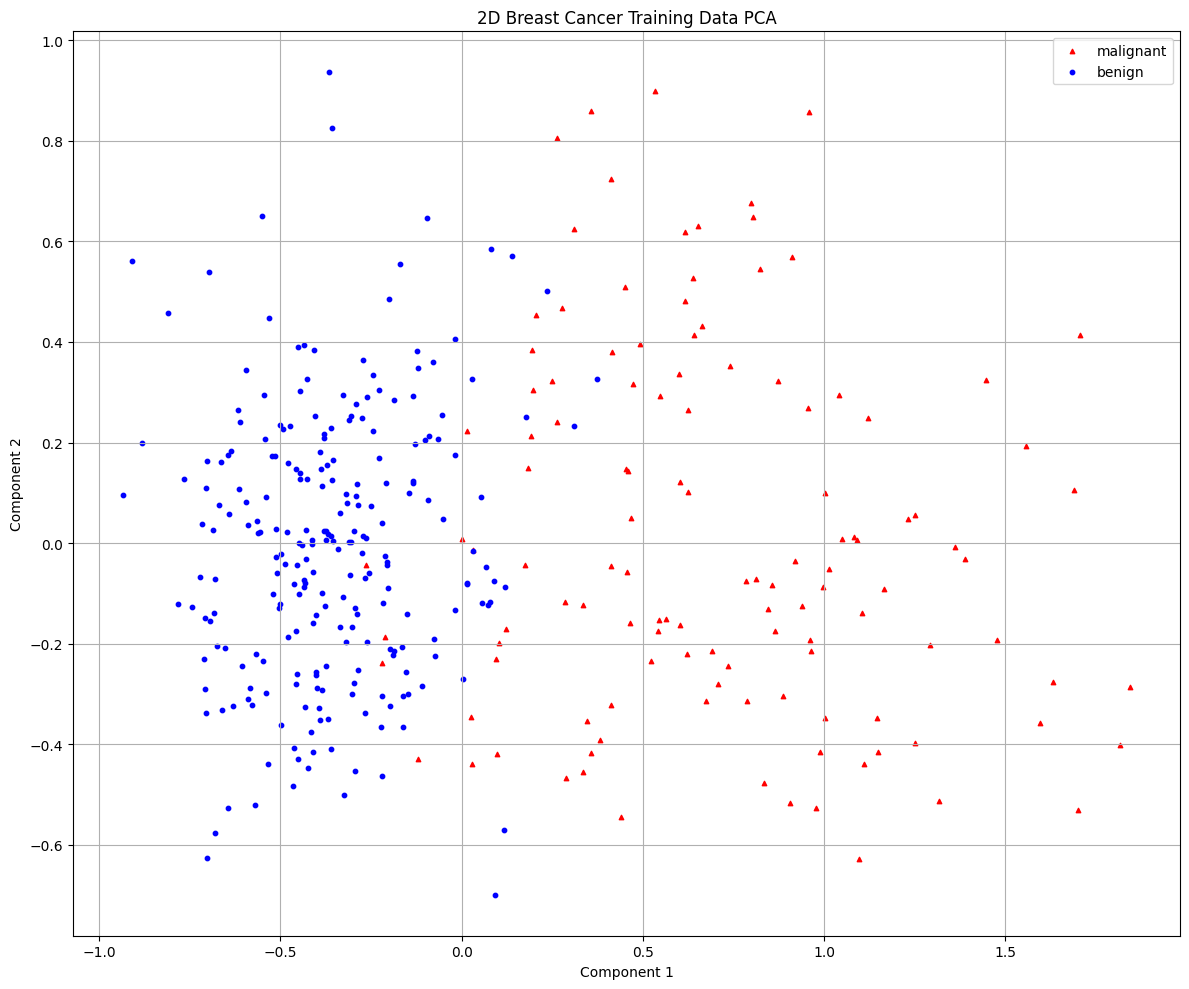

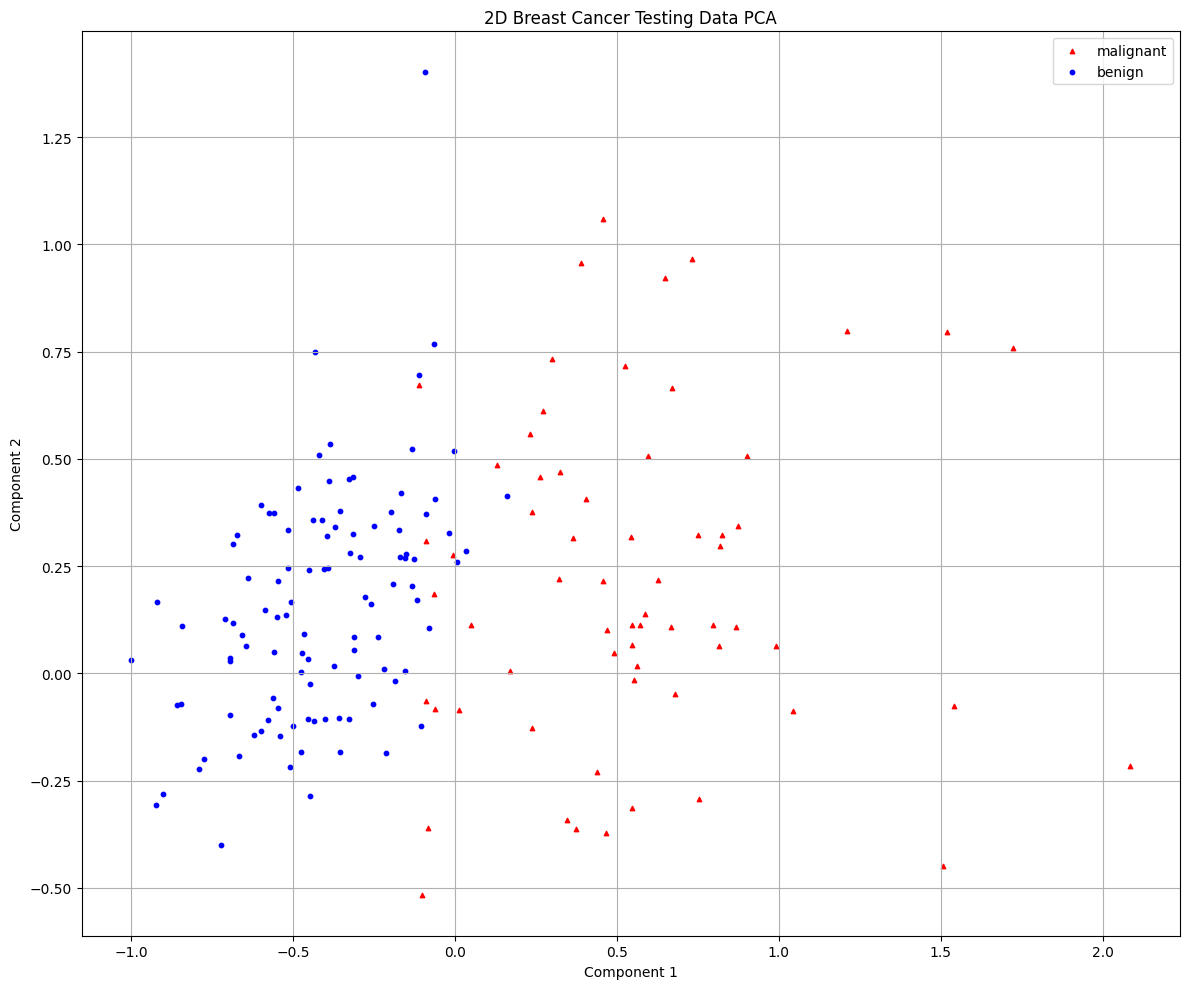

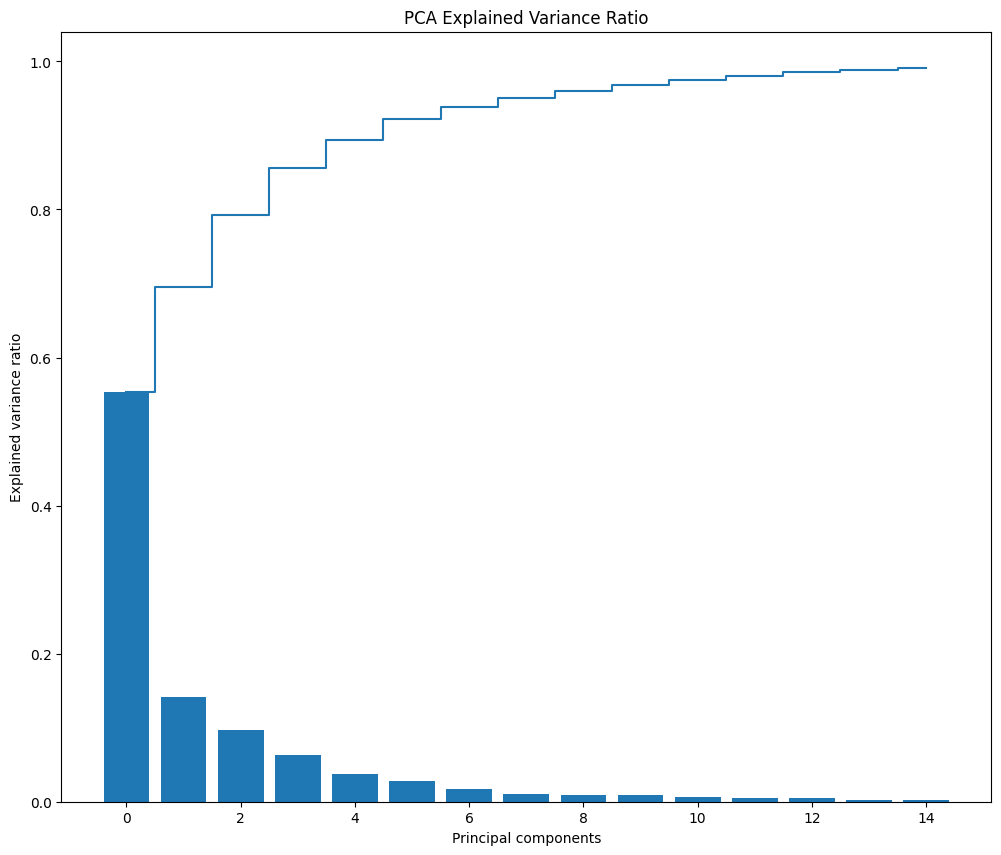

[I 2025-04-27 06:23:20,343] A new study created in memory with name: no-name-c5a8b45e-433d-4ea2-8ac6-cb14d0522edb
[I 2025-04-27 06:26:37,163] Trial 0 finished with value: 0.9641171993911721 and parameters: {'n_estimators': 9476, 'learning_rate': 0.29693155935917154, 'num_leaves': 55, 'max_depth': 11, 'min_child_samples': 89, 'subsample': 0.6418584993050962, 'colsample_bytree': 0.823654609198762, 'reg_alpha': 1.680270151235688e-08, 'reg_lambda': 1.3054221201582166}. Best is trial 0 with value: 0.9641171993911721.
[I 2025-04-27 06:28:02,379] Trial 1 finished with value: 0.955745814307458 and parameters: {'n_estimators': 4897, 'learning_rate': 0.0018063983796441263, 'num_leaves': 20, 'max_depth': 8, 'min_child_samples': 97, 'subsample': 0.4265369231306125, 'colsample_bytree': 0.7158444334066396, 'reg_alpha': 1.6815743121651063, 'reg_lambda': 0.08151409901893415}. Best is trial 0 with value: 0.9641171993911721.
[I 2025-04-27 06:29:18,138] Trial 2 finished with value: 0.9641552511415525 and

Best trial:
Accuracy: 0.9696727549467277
Best hyperparameters:  {'n_estimators': 9645, 'learning_rate': 0.12116515951441963, 'num_leaves': 28, 'max_depth': 12, 'min_child_samples': 13, 'subsample': 0.5418170251339937, 'colsample_bytree': 0.5243572074549369, 'reg_alpha': 2.2664027896162552e-07, 'reg_lambda': 0.09999142103909091}


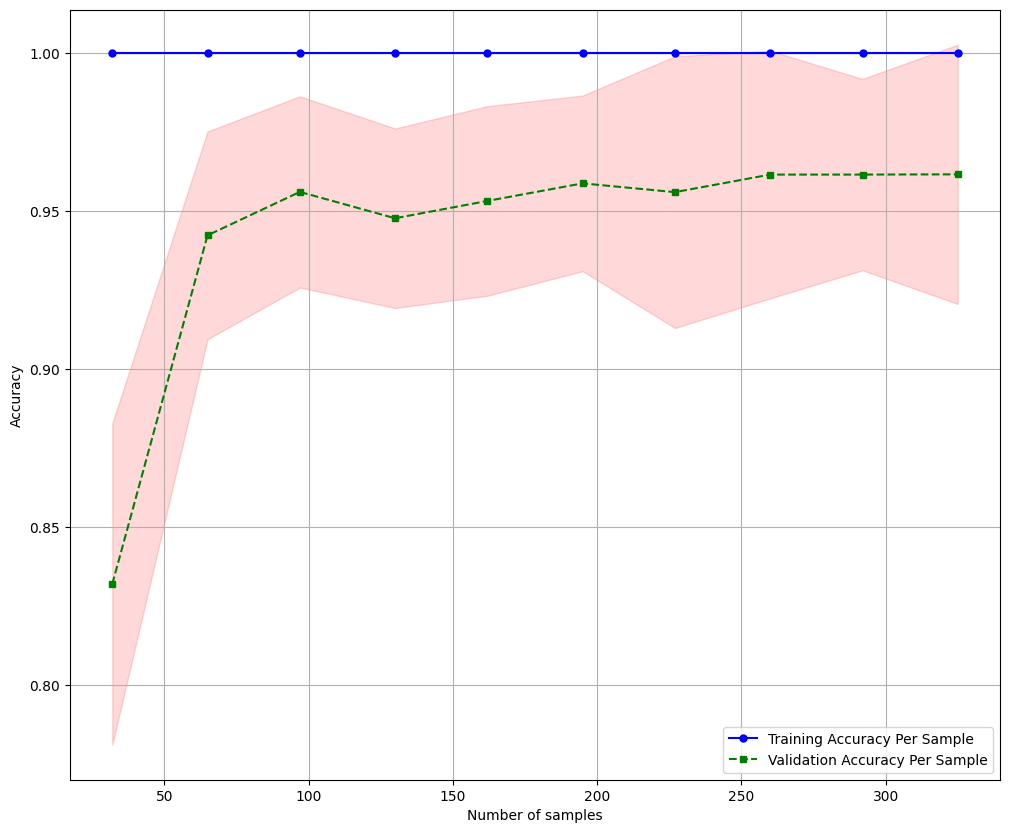

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC: 0.9890


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)